## Import Necessary Libraries:

numpy for numerical operations.

matplotlib for plotting.

tensorflow for building and training the neural network.

sklearn for splitting the dataset

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

## Generate Dataset:

generate_dataset function creates a dataset of images and their corresponding coordinates.

Each image is 50x50 pixels with one pixel set to 255 and the rest to 0.

The labels are the coordinates of the pixel with the value 255.

In [4]:
# Generate Dataset
def generate_dataset(num_images, img_size):
    images = np.zeros((num_images, img_size, img_size, 1))
    labels = np.zeros((num_images, 2))
    
    for i in range(num_images):
        x = np.random.randint(0, img_size)
        y = np.random.randint(0, img_size)
        images[i, x, y, 0] = 255
        labels[i] = [x, y]
    
    return images, labels

## Generate 10,000 Images:

Generate a dataset of 10,000 images.

Normalize the pixel values to be between 0 and 1 by dividing by 255.

In [6]:
# Generate 10,000 images of size 50x50
num_images = 10000
img_size = 50
X, y = generate_dataset(num_images, img_size)
X, y

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [8]:
# Normalize the images
X = X / 255.0
X

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

## Split Dataset:

Split the dataset into training and testing sets (80% training, 20% testing).

In [10]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

## Build the CNN Model:

The model consists of:
    
Two convolutional layers with ReLU activation.

A flattening layer to convert the 2D outputs of the convolutional layers to a 1D vector.
Two fully connected (dense) layers.

The final layer outputs the coordinates (2 values).



In [12]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


model


<Sequential name=sequential_1, built=True>

 ## Compile the Model:

Using the Adam optimizer.

Mean Squared Error (MSE) as the loss function since this is a regression problem.

Mean Absolute Error (MAE) as a metric for evaluation.




In [22]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

## Train the Model:

Train the model with the training data.

Use 20% of the training data for validation.

Train for 10 epochs.

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)
history 

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 33s 165ms/step - loss: 209.0457 - mae: 12.4920 - val_loss: 206.0085 - val_mae: 12.3456
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - loss: 208.5053 - mae: 12.4607 - val_loss: 206.4083 - val_mae: 12.3607
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 34s 169ms/step - loss: 208.9227 - mae: 12.5132 - val_loss: 206.9726 - val_mae: 12.3768
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 35s 173ms/step - loss: 208.5031 - mae: 12.4572 - val_loss: 206.3242 - val_mae: 12.3587
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - loss: 211.8605 - mae: 12.5882 - val_loss: 206.6941 - val_mae: 12.3556
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - loss: 209.5615 - mae: 12.4753 - val_loss: 213.4918 - val_mae: 12.5270
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 40s 201ms/step - loss: 208.3755 - mae: 12.4618 - val_loss: 206.1461 - val_mae: 12.3490
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 38s 190ms/step - loss: 208.6656 - mae: 12.5124 - val_loss: 206.9801 - v

## Evaluate the Model:

Evaluate the model on the test set to get the test loss and mean absolute error (MAE).

In [15]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 212.0406 - mae: 12.5803
Test MAE: 12.540310859680176


## Plot Training History:
Plot the training and validation loss over epochs to visualize the training process. 

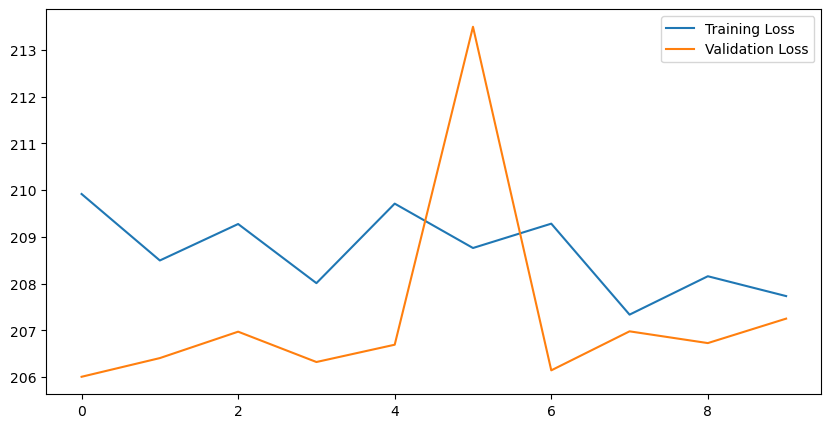

In [16]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

## Make Predictions and Visualize:

Make predictions on the test set.

Visualize a few test images with the ground truth (red dots) and the model's predictions (blue dots).

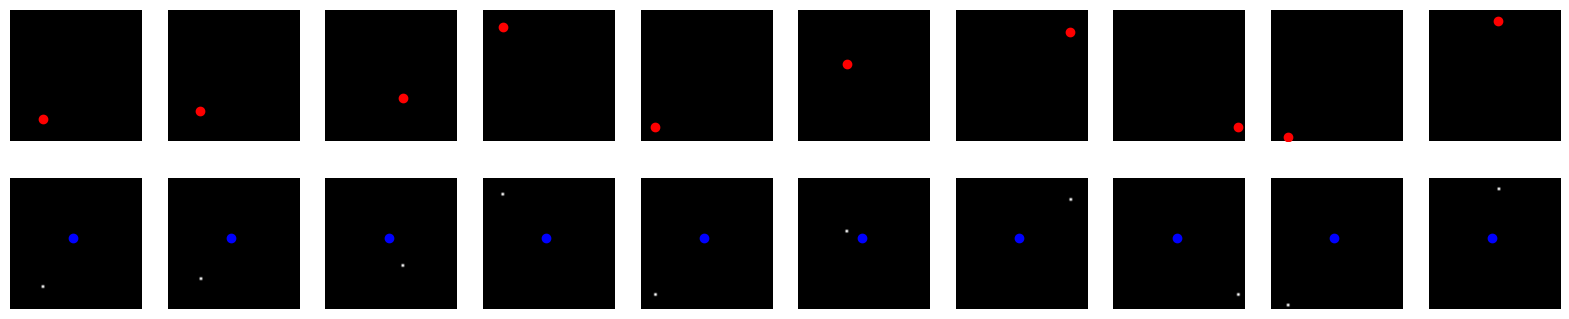

In [18]:
# Visualize predictions vs ground truth
num_samples = 10
fig, axes = plt.subplots(2, num_samples, figsize=(20, 4))
for i in range(num_samples):
    axes[0, i].imshow(X_test[i].reshape((img_size, img_size)), cmap='gray')
    axes[0, i].scatter(y_test[i, 1], y_test[i, 0], c='red')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(X_test[i].reshape((img_size, img_size)), cmap='gray')
    axes[1, i].scatter(predictions[i, 1], predictions[i, 0], c='blue')
    axes[1, i].axis('off')

plt.show()

In [21]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


array([[22.639172, 23.654272],
       [22.639172, 23.654272],
       [22.639172, 23.654272],
       ...,
       [22.639172, 23.654272],
       [22.639172, 23.654272],
       [22.639172, 23.654272]], dtype=float32)

## Key Points
Dataset Generation: Automatically creates images with a single pixel set to 255.
    
Model Design: Uses a CNN with convolutional layers to learn spatial features.
    
Training and Evaluation: Monitors training and validation loss to ensure the model is learning effectively.
    
Visualization: Compares predictions to the actual coordinates to visually verify the model's performance.
    
This approach demonstrates a clear and methodical way to address the problem using deep learning techniques, ensuring that the model can effectively predict the coordinates of the bright pixel in the images.